In [25]:
from simpful import *

FS = FuzzySystem()

d1 = FuzzySet(function=Trapezoidal_MF(0, 0, 20, 45), term="short")
d2 = FuzzySet(function=Trapezoidal_MF(20, 45, 105, 130), term="medium")
d3 = FuzzySet(function=Trapezoidal_MF(105, 130, 140, 140), term="long")
FS.add_linguistic_variable("distance", LinguisticVariable(
    [d1, d2, d3], universe_of_discourse=[0, 140], concept="distance"))

s1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=15, d=65), term="slow")
s2 = FuzzySet(function=Triangular_MF(a=15, b=65, c=115), term="medium")
s3 = FuzzySet(function=Trapezoidal_MF(a=65, b=115, c=120, d=120), term="fast")
FS.add_linguistic_variable("speed", LinguisticVariable([s1, s2, s3], concept="speed",
                                                          universe_of_discourse=[0, 120]))

a1 = FuzzySet(function=Trapezoidal_MF(a=-1, b=-1, c=-0.4, d=0), term="high_minus")
a2 = FuzzySet(function=Triangular_MF(a=-0.4, b=0, c=0.1), term="small_minus")
a3 = FuzzySet(function=Triangular_MF(a=-0.1, b=0, c=0.4), term="small_plus")
a4 = FuzzySet(function=Trapezoidal_MF(a=0, b=0.4, c=1, d=1), term="high_plus")
FS.add_linguistic_variable("acceleration", LinguisticVariable([a1, a2, a3, a4], concept="acceleration",
                                                          universe_of_discourse=[-1, 1]))

FS.add_rules([
    "IF (distance IS short) AND (speed IS slow) THEN (acceleration IS high_minus)",
    "IF (distance IS medium) AND (speed IS slow) THEN (acceleration IS small_minus)",
    "IF (distance IS long) AND (speed IS slow) THEN (acceleration IS small_minus)",
    "IF (distance IS short) AND (speed IS medium) THEN (acceleration IS high_plus)",
    "IF (distance IS medium) AND (speed IS medium) THEN (acceleration IS small_minus)",
    "IF (distance IS long) AND (speed IS medium) THEN (acceleration IS small_minus)",
    "IF (distance IS short) AND (speed IS fast) THEN (acceleration IS small_plus)",
    "IF (distance IS medium) AND (speed IS fast) THEN (acceleration IS high_minus)",
    "IF (distance IS long) AND (speed IS fast) THEN (acceleration IS small_minus)",
])


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



In [33]:
test_cases = [
    {"distance": 30, "speed": 50},
    {"distance": 100, "speed": 50},
    {"distance": 30, "speed": 65},
    {"distance": 70, "speed": 60},
]

for test_case in test_cases:
    FS.set_variable("distance", test_case["distance"])
    FS.set_variable("speed", test_case["speed"])
    result = FS.inference()
    print("distance: {}, speed: {}, {}".format(test_case["distance"], test_case["speed"], result))


distance: 30, speed: 50, {'acceleration': 0.16177469044869522}
distance: 100, speed: 50, {'acceleration': -0.1069228624338843}
distance: 30, speed: 65, {'acceleration': 0.40471642682957754}
distance: 70, speed: 60, {'acceleration': -0.10090888848403874}


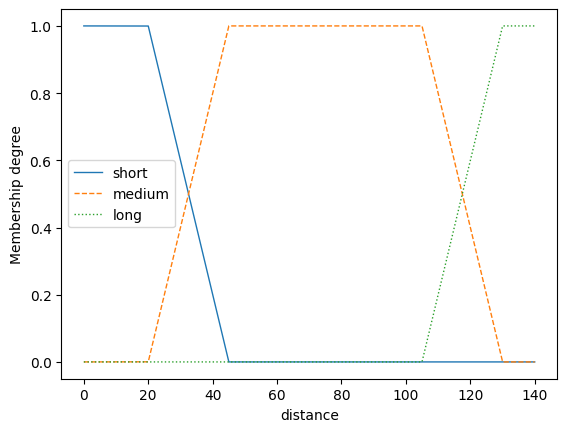

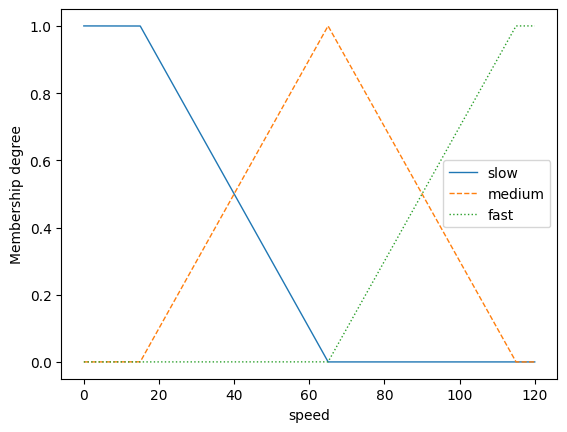

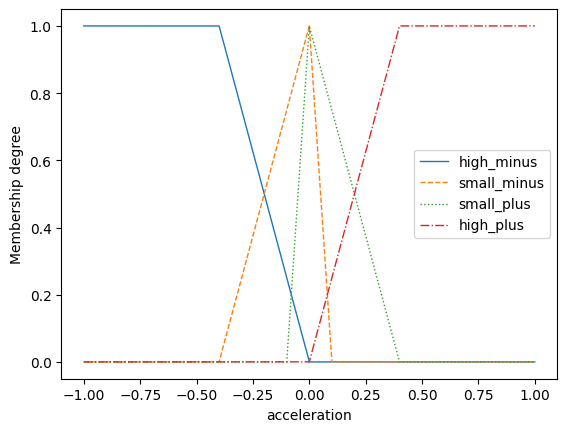

In [27]:
FS.plot_variable('distance')
FS.plot_variable('speed')
FS.plot_variable('acceleration')